In [1]:
import pandas as pd
import numpy as np
import nltk
import os
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aom2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df_bin = pd.read_excel("content/final_trainset.xlsx")
df_bin['binary2_label'].value_counts()
df_test = pd.read_excel("content/final_testset.xlsx")
df_bin['ABSTRACT'] = df_bin['ABSTRACT'].apply(str.lower)
df_test['ABSTRACT'] = df_test['ABSTRACT'].apply(str.lower)

In [3]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import scikitplot as skplt

def bin_model(model_type, vectortype, C=1, select_features=8150):
    # Vectorization
    vectorizer = TfidfVectorizer() if vectortype == "tfidf" else CountVectorizer()        
    X_train = vectorizer.fit_transform(df_bin['ABSTRACT'])
    y_train = df_bin['binary2_label']
    
    # Feature Selection
    selector = SelectKBest(score_func=chi2, k=select_features)
    X_train_sel = selector.fit_transform(X_train, y_train)
    selected_features = vectorizer.get_feature_names_out()[selector.get_support()]

    # Define the model
    model = {
        'nb': MultinomialNB(),
        'lr': LogisticRegression(max_iter=1000),
        'svm': LinearSVC(C=C),
        'knn': KNeighborsClassifier(n_neighbors=7),
        'rf': RandomForestClassifier(),
        'ada': AdaBoostClassifier(n_estimators=50),
        'gb': GradientBoostingClassifier(n_estimators=50)
    }.get(model_type, LinearSVC(C=C))  # Default to SVM if type is unknown

    # Cross-validation
    cv_scores = cross_val_score(model, X_train_sel, y_train, cv=5)
    print(f'Cross-validation Accuracy: {np.mean(cv_scores)}')

    # Training the model on the entire training set
    model.fit(X_train_sel, y_train)

    # Preprocess and predict the test set
    X_test = vectorizer.transform(df_test['ABSTRACT'])
    X_test_sel = selector.transform(X_test)
    y_test = df_test['binary2_label']
    y_pred = model.predict(X_test_sel)

    # Evaluation
    test_accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="macro")
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average="macro")

    print(f'Test Accuracy: {test_accuracy}')
    print(f'F1 score: {f1}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')

    # Confusion Matrix Plot
    skplt.metrics.plot_confusion_matrix(y_test, y_pred, title="Binary Confusion Matrix")
    plt.show()

    return {
        'model': model,
        'feature_names': selected_features,
        'cv_scores': cv_scores,
        'X_train_sel': X_train_sel,
        'y_train': y_train,
        'X_test_sel': X_test_sel,
        'y_test': y_test,
        'y_pred': y_pred
    }


C:\Users\aom2\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\aom2\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\aom2\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\aom2\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users

Cross-validation Accuracy: 0.7821352324506898
Test Accuracy: 0.8004807692307693
F1 score: 0.7904536489151874
Precision: 0.8043061718434852
Recall: 0.7853225539559843


C:\Users\aom2\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


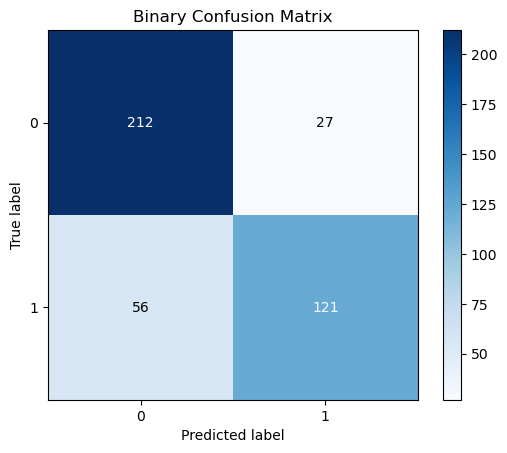

In [7]:
# Usage example (assuming df_bin and df_test are already defined):
module_1 = bin_model('svm', 'tfidf',C=1)